c:\Users\Dwij\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy score of model:100.00%
Customer is likely to claim insurance


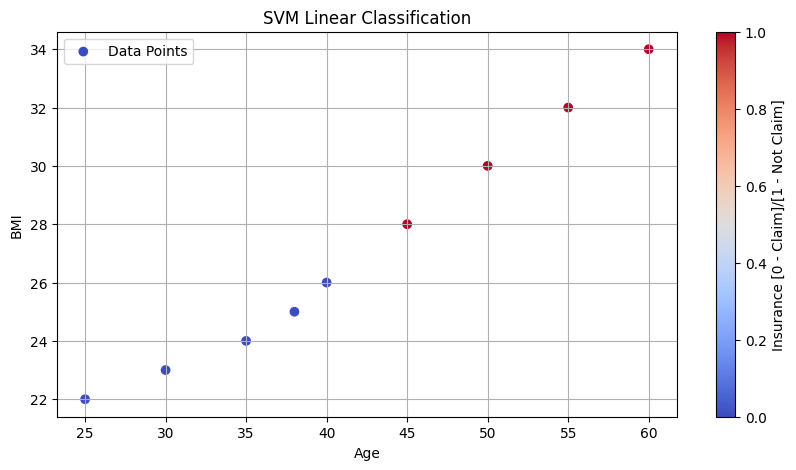

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('list3.csv')
X = data.iloc[:,[0,1]]
Y = data.iloc[:,2]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = svm.SVC(kernel='linear',C=2.0)
model.fit(X_train,Y_train)

new_data = np.array([[45,28]])
new_data = scaler.transform(new_data)
prediction = model.predict(new_data)

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)

print(f"Accuracy score of model:{accuracy*100:.2f}%")

if prediction[0] == 1:
    print("Customer is likely to claim insurance")
else:
    print("Customer is not likely to claim insurance")
    
plt.figure(figsize=(10,5))
plt.scatter(X['Age'],X['BMI'],c=Y,cmap='coolwarm',label='Data Points')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('SVM Linear Classification')
plt.colorbar(label='Insurance [0 - Claim]/[1 - Not Claim]')
plt.grid(True)
plt.legend()
plt.show()